This notebook was written by Prach Techameena to be used for the practical analysis of old ST data from Ortiz et al., Sci. Adv. 2020.  
The dataset for this practical analysis was downloaded from GEO database under the accession id of GSE147747.

In [2]:
import stlearn as st
import scanpy as sc
import pandas as pd
import anndata as an
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import scanorama

In [2]:
st.settings.set_figure_params(dpi=180)
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

# Load in data and perform QC

## Declare get_adata_dict function  
The function works by formatting data from files and creating a dictionary stLearn Anndata objects

In [3]:
def get_adata_dict(path_to_folders):
    
    folders = os.listdir(path_to_folders) # List all the folders in path_to_folders
    
    # Create list of path names for count_matrix, metadata_matrix, and img files within each folder
    count_data = []
    imgs = []
    metadata = []
    for folder in folders:
        count_data += glob.glob(f'{path_to_folders}/{folder}/expr*.tsv.gz')
        metadata += glob.glob(f'{path_to_folders}/{folder}/meta*.tsv.gz')
        imgs += glob.glob(f'{path_to_folders}/{folder}/*.jpg')
    
    # Create dictionaries of DF objects. One list containing objects of count data and the other containing objects of metadata
    count_matrix = {}
    meta_matrix = {}
    spatial = {}
    for i in range(len(count_data)):
        temp_count = pd.read_csv(count_data[i], index_col=0, compression='gzip', sep='\t')
        temp_meta = pd.read_csv(metadata[i], index_col=0, compression='gzip', sep='\t')
        count_matrix[i] = temp_count
        meta_matrix[i] = temp_meta
        temp_spatial = meta_matrix[i][['HE_X','HE_Y']]
        temp_spatial.columns = ['imagecol', 'imagerow']
        spatial[i] = temp_spatial
    
    # Create a Dictionary of stLearn Anndatas
    adata = {}
    for i in range(len(count_matrix)):
        adata[i] = st.create_stlearn(count=count_matrix[i],spatial=spatial[i],library_id=folders[i],image_path=imgs[i], scale=1,background_color="white")
        subset = meta_matrix[i].drop(columns=['HE_X','HE_Y'])
        adata[i].obs = adata[i].obs.join(subset)
        adata[i].obs['cluster_name'] = adata[i].obs['cluster_name'].astype("category")
        adata[i].obs['cluster_id'] = adata[i].obs['cluster_id'].astype("category")
        
    return adata
    

### Create the dictionary of Anndata objects with get_adata_dict function

In [5]:
adata = get_adata_dict('/Users/pax/Google Drive/My Drive/Thesis/Practice/Data/GSE147747_edit')

Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue image to the object!
Added tissue i

### Save spatial data in h5ad format

In [50]:
folders = os.listdir('/Users/pax/Google Drive/My Drive/Thesis/Practice/Data/GSE147747_edit')
results_folder = '/Users/pax/Google Drive/My Drive/Thesis/Practice/Data/h5ad'

In [19]:
for i in range(len(adata)):
    adata[i].write(f'{results_folder}/{folders[i]}.h5ad')

/usr/local/anaconda3/envs/stlearn/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'section_index' as categorical
/usr/local/anaconda3/envs/stlearn/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'ABA_acronym' as categorical
/usr/local/anaconda3/envs/stlearn/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be rem

# Read h5ad data to dictionary of Anndatas

In [34]:
folders = os.listdir('/Users/pax/Google Drive/My Drive/Thesis/Practice/Data/GSE147747_edit')
results_folder = '/Users/pax/Google Drive/My Drive/Thesis/Practice/Data/h5ad'
files_to_read = os.listdir(f'{results_folder}')
adatas = {}
for i in range(len(files_to_read)):
    adatas[i] = sc.read_h5ad(f'{results_folder}/{files_to_read[i]}')

In [19]:
# st.pl.cluster_plot(adatas[40], use_label="cluster_name", size = 20)

### QC of stLearn Anndatas

In [38]:
adata_edit = {}
for i in range(len(adatas)):
    adata_edit[i] = adatas[i].copy()
    adata_edit[i].var_names_make_unique()
    sc.pp.calculate_qc_metrics(adata_edit[i], inplace=True)
    st.pp.normalize_total(adata_edit[i], inplace=True)
    st.pp.log1p(adata_edit[i])
    st.pp.scale(adata_edit[i])
    # sc.pp.highly_variable_genes(adata_edit[i], flavor="seurat", n_top_genes=2000)

Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization st

/usr/local/anaconda3/envs/stlearn/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:182: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X


/usr/local/anaconda3/envs/stlearn/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:182: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization st

/usr/local/anaconda3/envs/stlearn/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:182: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X


/usr/local/anaconda3/envs/stlearn/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:182: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X
Normalization st

# Data integration

In [39]:
adata_list = list(adata_edit.values())

In [6]:
adatas_cor = scanorama.correct_scanpy(adata_list, return_dimred=True)

Found 23371 genes among all datasets
[[0.         0.72368421 0.32894737 ... 0.         0.         0.        ]
 [0.         0.         0.30964467 ... 0.00507614 0.         0.        ]
 [0.         0.         0.         ... 0.         0.00531915 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.4893617  0.47196262]
 [0.         0.         0.         ... 0.         0.         0.51869159]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Processing datasets (0, 1)
Processing datasets (65, 66)
Processing datasets (10, 11)
Processing datasets (54, 55)
Processing datasets (52, 55)
Processing datasets (11, 12)
Processing datasets (8, 9)
Processing datasets (8, 11)
Processing datasets (9, 11)
Processing datasets (69, 70)
Processing datasets (51, 53)
Processing datasets (11, 13)
Processing datasets (12, 13)
Processing datasets (50, 51)
Processing datasets (52, 54)
Processing datasets (59, 60)
Processing datasets (68, 70)
Processing datasets (41, 42)
Pro

In [40]:
batch_cat = []
for i in range(len(adata_list)):
    for k, v in adata_list[i].uns["spatial"].items():
        batch_cat.append(k)

In [8]:
adata_spatial = adatas_cor[0].concatenate(
    adatas_cor[1:],
    batch_key="library_id",
    uns_merge="unique",
    batch_categories=batch_cat)

In [8]:
adata_spatial.obs

,imagecol,imagerow,section_index,stereo_ML,stereo_DV,stereo_AP,ABA_acronym,ABA_name,ABA_parent,nuclei_segmented,...,cluster_name,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,library_id
01A_13.26x27.17-GSM4459917,3464.868,7558.050,01A,1.265025,-1.723300,2.945,MOs1,"Secondary motor area, layer 1",Isocortex,0,...,Isocortex-01,2526,7.834788,4220.0,8.347827,11.800948,18.080569,26.848341,44.407583,GSM4459917
01A_13.28x28.21-GSM4459917,3471.675,7857.362,01A,1.052525,-1.692050,2.945,MOs1,"Secondary motor area, layer 1",Isocortex,0,...,Isocortex-09,2546,7.842671,4203.0,8.343792,12.705211,19.034023,28.170355,45.134428,GSM4459917
01A_14.27x31.3-GSM4459917,3751.086,8749.132,01A,0.388342,-1.830886,2.945,MOs1,"Secondary motor area, layer 1",Isocortex,1,...,Isocortex-52,3787,8.239593,8104.0,9.000237,11.586871,17.867720,26.505429,42.892399,GSM4459917
01A_14.28x27.2-GSM4459917,3754.194,7565.416,01A,1.233775,-2.017050,2.945,MOs2/3,"Secondary motor area, layer 2/3",Isocortex,3,...,Isocortex-43,3558,8.177235,7097.0,8.867568,11.075102,17.190362,25.531915,41.834578,GSM4459917
01A_14.28x29.25-GSM4459917,3752.361,8157.474,01A,0.813390,-1.918360,2.945,MOs2/3,"Secondary motor area, layer 2/3",Isocortex,5,...,Isocortex-52,4451,8.401109,10335.0,9.243388,10.633769,15.926463,23.560716,39.574262,GSM4459917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40B_6.95x24.09-GSM4459991,1733.499,6717.224,40B,0.823150,-2.507150,-5.455,ICd,"Inferior colliculus, dorsal nucleus",Midbrain,8,...,Midbrain-10,4924,8.502080,12003.0,9.392995,9.839207,15.229526,23.260851,38.507040,GSM4459991
40B_6.95x25.1-GSM4459991,1733.542,7012.154,40B,0.423150,-2.313400,-5.455,ICd,"Inferior colliculus, dorsal nucleus",Midbrain,9,...,Midbrain-10,4685,8.452335,10851.0,9.292105,9.658096,15.187540,23.315823,39.259054,GSM4459991
40B_6.96x23.09-GSM4459991,1738.341,6428.638,40B,1.260650,-2.575900,-5.455,ICe,"Inferior colliculus, external nucleus",Midbrain,9,...,Midbrain-10,5021,8.521584,12494.0,9.433084,9.996798,15.263326,22.995038,38.242356,GSM4459991
40B_7.9x22.06-GSM4459991,2011.772,6128.426,40B,1.718463,-2.866525,-5.455,ICe,"Inferior colliculus, external nucleus",Midbrain,4,...,Mixed-06 (fiber tracts),3907,8.270781,8276.0,9.021235,17.617206,23.042533,30.340744,44.175930,GSM4459991


In [15]:
st.pp.neighbors(adata_spatial, use_rep='X_scanorama')
sc.tl.umap(adata_spatial)
# st.tl.clustering.louvain(adata_spatial)
sc.tl.leiden(adata_spatial, key_added="clusters")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:20)
running Leiden clustering
    finished: found 21 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:05)


In [17]:
adata_spatial.write('/Users/pax/Google Drive/My Drive/Thesis/Practice/Data/adata_spatial.h5ad')

In [16]:
adata_spatial = sc.read_h5ad('/Users/pax/Google Drive/My Drive/Thesis/Practice/Data/adata_spatial.h5ad')

In [25]:
adata_spatial.obs.cluster_name = adata_spatial.obs.cluster_name.astype(str)
adata_spatial.obs.cluster_name[adata_spatial.obs.cluster_name.isna()] = 'None'
adata_spatial.obs['cluster_name'] = adata_spatial.obs['cluster_name'].astype("category")

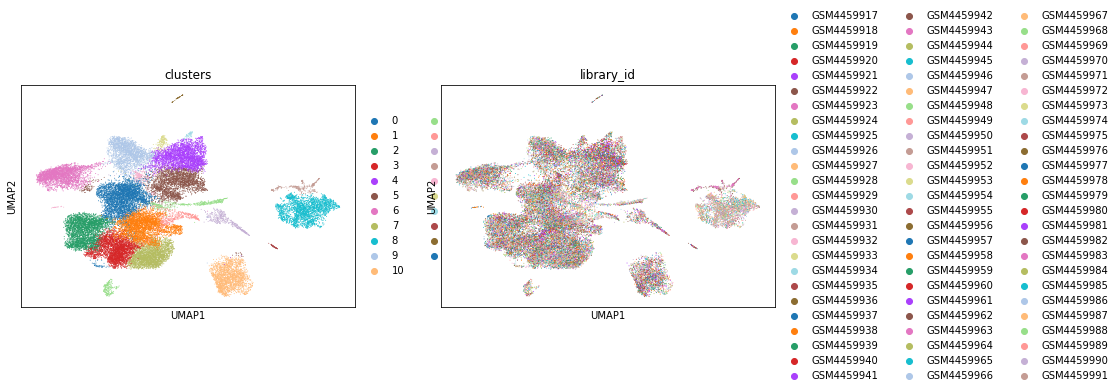

In [27]:
sc.pl.umap(
    adata_spatial, color=["clusters", "library_id"]
)

In [35]:
adata_spatial.obs

,imagecol,imagerow,section_index,stereo_ML,stereo_DV,stereo_AP,ABA_acronym,ABA_name,ABA_parent,nuclei_segmented,...,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,library_id,louvain,clusters
01A_13.26x27.17-GSM4459917,3464.868,7558.050,01A,1.265025,-1.723300,2.945,MOs1,"Secondary motor area, layer 1",Isocortex,0,...,7.834788,4220.0,8.347827,11.800948,18.080569,26.848341,44.407583,GSM4459917,2,0
01A_13.28x28.21-GSM4459917,3471.675,7857.362,01A,1.052525,-1.692050,2.945,MOs1,"Secondary motor area, layer 1",Isocortex,0,...,7.842671,4203.0,8.343792,12.705211,19.034023,28.170355,45.134428,GSM4459917,2,0
01A_14.27x31.3-GSM4459917,3751.086,8749.132,01A,0.388342,-1.830886,2.945,MOs1,"Secondary motor area, layer 1",Isocortex,1,...,8.239593,8104.0,9.000237,11.586871,17.867720,26.505429,42.892399,GSM4459917,8,2
01A_14.28x27.2-GSM4459917,3754.194,7565.416,01A,1.233775,-2.017050,2.945,MOs2/3,"Secondary motor area, layer 2/3",Isocortex,3,...,8.177235,7097.0,8.867568,11.075102,17.190362,25.531915,41.834578,GSM4459917,8,2
01A_14.28x29.25-GSM4459917,3752.361,8157.474,01A,0.813390,-1.918360,2.945,MOs2/3,"Secondary motor area, layer 2/3",Isocortex,5,...,8.401109,10335.0,9.243388,10.633769,15.926463,23.560716,39.574262,GSM4459917,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40B_6.95x24.09-GSM4459991,1733.499,6717.224,40B,0.823150,-2.507150,-5.455,ICd,"Inferior colliculus, dorsal nucleus",Midbrain,8,...,8.502080,12003.0,9.392995,9.839207,15.229526,23.260851,38.507040,GSM4459991,7,8
40B_6.95x25.1-GSM4459991,1733.542,7012.154,40B,0.423150,-2.313400,-5.455,ICd,"Inferior colliculus, dorsal nucleus",Midbrain,9,...,8.452335,10851.0,9.292105,9.658096,15.187540,23.315823,39.259054,GSM4459991,7,8
40B_6.96x23.09-GSM4459991,1738.341,6428.638,40B,1.260650,-2.575900,-5.455,ICe,"Inferior colliculus, external nucleus",Midbrain,9,...,8.521584,12494.0,9.433084,9.996798,15.263326,22.995038,38.242356,GSM4459991,7,8
40B_7.9x22.06-GSM4459991,2011.772,6128.426,40B,1.718463,-2.866525,-5.455,ICe,"Inferior colliculus, external nucleus",Midbrain,4,...,8.270781,8276.0,9.021235,17.617206,23.042533,30.340744,44.175930,GSM4459991,14,14


In [66]:
clusters_colors = dict(
    zip([str(i) for i in range(18)], adata_spatial.uns["clusters_colors"])
)

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

for i, library in enumerate(batch_cat[0:10]):
    ad = adata_spatial[adata_spatial.obs.library_id == library, :].copy()
    sc.pl.spatial(ad, img_key="hires", library_id=library, size=1.5, palette=[
            v
            for k, v in clusters_colors.items()
            if k in ad.obs.clusters.unique().tolist()
        ],
        legend_loc=None,
        show=False,
        ax=axs[i],
    )
    
plt.tight_layout()